In [1]:
# importing all necessay libraries
import unicodecsv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm
import calendar
from seaborn import countplot, set_style,despine, axes_style, set_palette, color_palette
from matplotlib.pyplot import subplot, show
from IPython.display import display
from pandas import DataFrame, set_option


In [2]:
# reading the data set 
flights = pd.read_csv("DelayedFlights.csv")
flights.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [3]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [4]:
flights.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
# creating new variables and renaming 
flights['DepDate'] = pd.to_datetime(flights.Year*10000+flights.Month*100+flights.DayofMonth,format='%Y%m%d')

In [6]:
#Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)
for dataset in flights:
    flights.loc[flights['ArrDelay'] <= 15, 'Status'] = 0
    flights.loc[flights['ArrDelay'] >= 15, 'Status'] = 1
    flights.loc[flights['ArrDelay'] >= 60, 'Status'] = 2
    flights.loc[flights['Diverted'] == 1, 'Status'] = 3
    flights.loc[flights['Cancelled'] == 1, 'Status'] = 4

In [7]:
#Cancellation cause
flights.loc[flights["CancellationCode"] =="A", 'CancellationCode'] = "0"
flights.loc[flights["CancellationCode"] =="B", 'CancellationCode'] = "1"
flights.loc[flights["CancellationCode"] =="C", 'CancellationCode'] = "2"

In [8]:
flights.isna().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
DepDate                   0
Status                    0
dtype: int64

In [9]:
#Null value Imputation using Interpolation Method
flights['ActualElapsedTime']=flights['ActualElapsedTime'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
flights['CRSElapsedTime']=flights['CRSElapsedTime'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
flights['AirTime']=flights['AirTime'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
flights['ArrTime']=flights['ArrTime'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
flights['ArrDelay']=flights['ArrDelay'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
flights['CarrierDelay']=flights['CarrierDelay'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
flights['WeatherDelay']=flights['WeatherDelay'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
flights['NASDelay']=flights['NASDelay'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
flights['LateAircraftDelay']=flights['LateAircraftDelay'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
flights['SecurityDelay']=flights['SecurityDelay'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
flights['TaxiIn']=flights['TaxiIn'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
flights['TaxiOut']=flights['TaxiOut'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
flights.isna().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              5
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
DepDate              0
Status               0
dtype: int64

C:\Users\kabee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


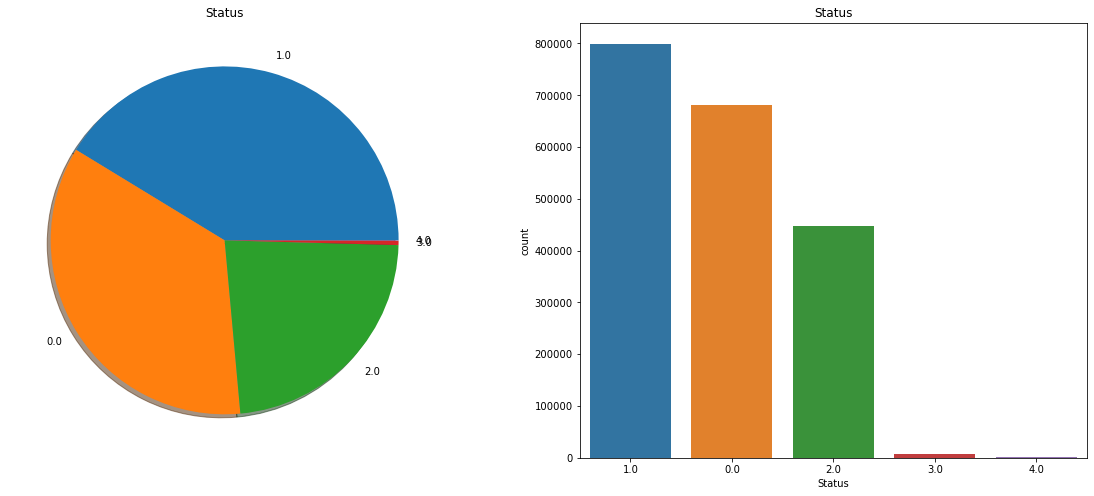

Status represents flight was on time(0), slightly delayed(1), highly delayed(2), diverted(3), or cancelled(4)


In [11]:
# plotting staus graphs showing if ontime,slightly delayed ,highly delayed,cancelled or diverted
f,ax=plt.subplots(1,2,figsize=(20,8))
flights['Status'].value_counts().plot.pie(ax=ax[0],shadow=True)
ax[0].set_title('Status')
ax[0].set_ylabel('')
sns.countplot('Status',order = flights['Status'].value_counts().index, data=flights,ax=ax[1])
ax[1].set_title('Status')
plt.show()

print('Status represents flight was on time(0), slightly delayed(1), highly delayed(2), diverted(3), or cancelled(4)')

C:\Users\kabee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


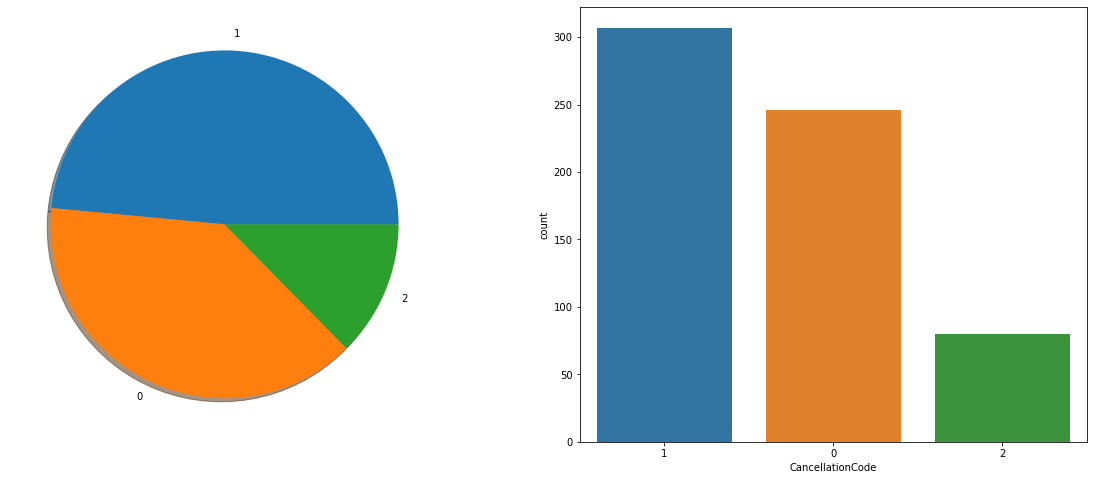

0 = carrier, 1 = weather, 2 = NAS


In [12]:
#plotting cancelled flights due to nas , weather, carrier
CancFlights = flights[(flights.Status == 4)]

f,ax=plt.subplots(1,2,figsize=(20,8))
CancFlights['CancellationCode'].value_counts().plot.pie(ax=ax[0],shadow=True)
ax[0].set_ylabel('')
sns.countplot('CancellationCode', order = CancFlights['CancellationCode'].value_counts().index, data=CancFlights, ax=ax[1])
plt.show()


print('0 = carrier, 1 = weather, 2 = NAS')

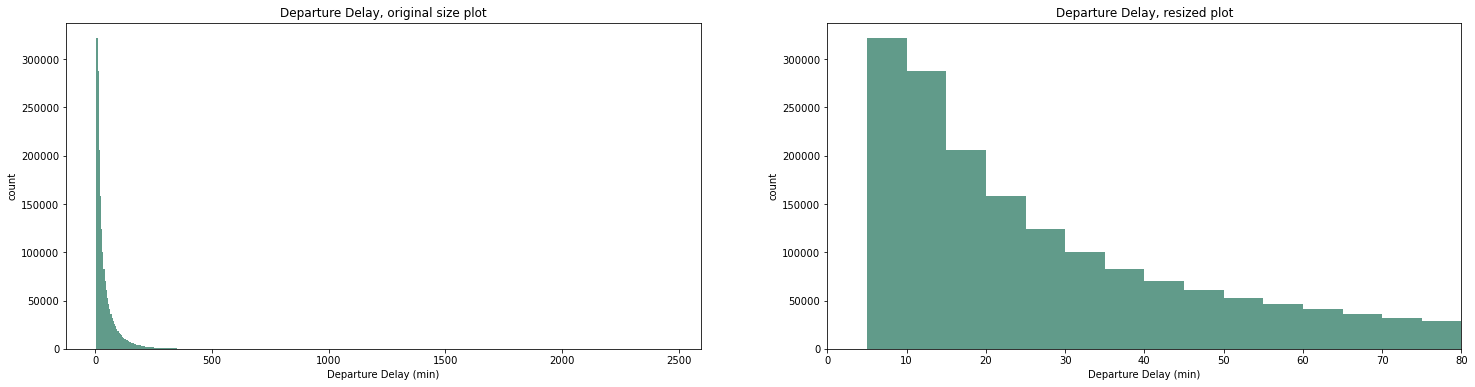

In [13]:
# Define basic color for exploration plots
color = '#619b8a'

# Plot DepDelay
binsize = 5
bins = np.arange(0, flights['DepDelay'].max()+binsize, binsize)

plt.figure(figsize = [25, 6])

# standart plot
plt.subplot(1, 2, 1) 
plt.hist(data = flights, x='DepDelay', bins=bins, color=color)
plt.xlabel('Departure Delay (min)')
plt.ylabel('count')
plt.title('Departure Delay, original size plot')

# resized plot
plt.subplot(1, 2, 2)
plt.hist(data = flights, x = 'DepDelay', bins=bins, color=color)
plt.xlabel('Departure Delay (min)')
plt.ylabel('count')
plt.xlim((0,80))
plt.title('Departure Delay, resized plot');
plt.show()

Upper margin for outliers: 114.5
Amount of outliers: 154731
686014     2467.0
322516     2457.0
839306     1952.0
1009553    1710.0
1881639    1597.0
1497823    1552.0
685437     1545.0
545038     1521.0
1214839    1518.0
521096     1490.0
1875741    1428.0
1885481    1403.0
685763     1401.0
1498689    1395.0
1554448    1369.0
Name: DepDelay, dtype: float64


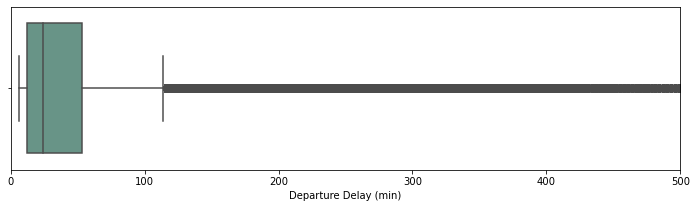

In [14]:
# Determine outliers by IQR, using box plot and visually

Q1 = flights.DepDelay.quantile(0.25)
Q3 = flights.DepDelay.quantile(0.75)
IQR = Q3 - Q1
margin = IQR * 1.5 + Q3
print('Upper margin for outliers: ' + str(margin))

count = flights[flights['DepDelay'] > margin].Month.count()
print('Amount of outliers: ' + str(count))

plt.figure(figsize = [12, 3])
sns.boxplot(x=flights['DepDelay'], color=color)
plt.xlabel('Departure Delay (min)')
plt.xlim((0,500));

print(flights.DepDelay.sort_values(ascending=False)[:15])

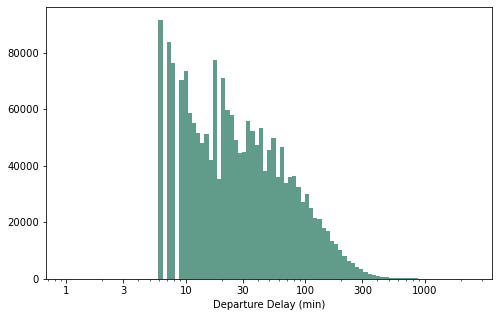

In [15]:
# Log scale distribution 

log_binsize = 0.035
bins = 10 ** np.arange(0, np.log10(flights['DepDelay'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = flights, x = 'DepDelay', bins = bins, color=color)
plt.xscale('log')
plt.xticks([1, 3, 10, 30, 100, 300, 1000], [1, 3, 10, 30, 100, 300, 1000])
plt.xlabel('Departure Delay (min)')
plt.show()

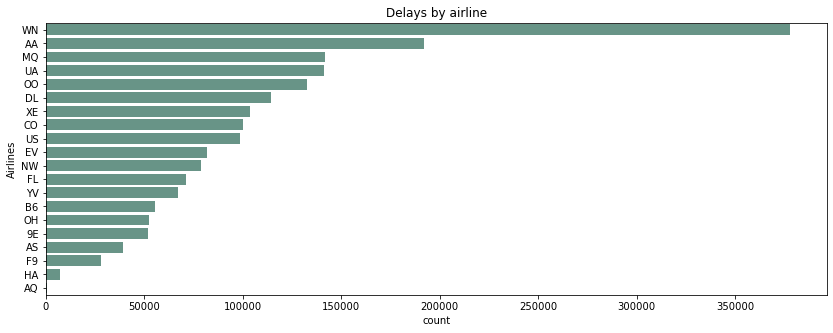

In [16]:
# Plot counts for all airlines in the dataset
plt.figure(figsize = [14, 5])
carriers_order = flights.UniqueCarrier.value_counts().index

sns.countplot(data = flights, y = 'UniqueCarrier',color = color, order = carriers_order);
plt.ylabel('Airlines')
plt.title('Delays by airline');

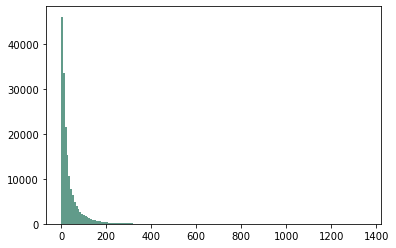

In [17]:
# plot weather delay distribution 
bins = np.arange(1, flights['WeatherDelay'].max()+7, 8)
plt.hist(data = flights, x='WeatherDelay', color=color, bins=bins);

In [18]:
## Delayed flights
Delayedflights = flights[(flights.Status >= 1) &(flights.Status < 3)]

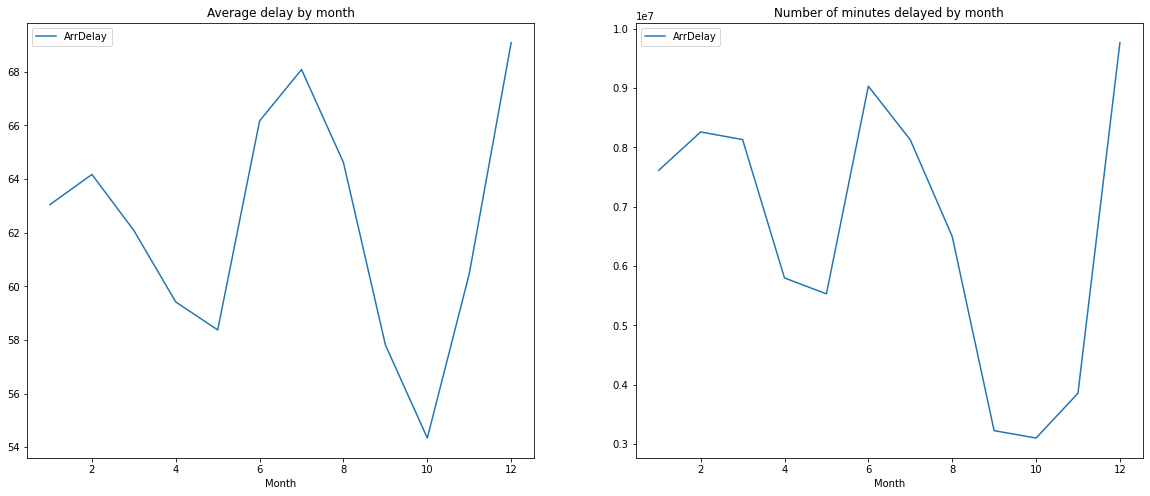

In [19]:
# plotting average delay by month and number of minutes delayed by month
f,ax=plt.subplots(1,2,figsize=(20,8))
Delayedflights[['Month','ArrDelay']].groupby(['Month']).mean().plot(ax=ax[0])
ax[0].set_title('Average delay by month')
Delayedflights[['Month','ArrDelay']].groupby(['Month']).sum().plot(ax=ax[1])
ax[1].set_title('Number of minutes delayed by month')
plt.show()


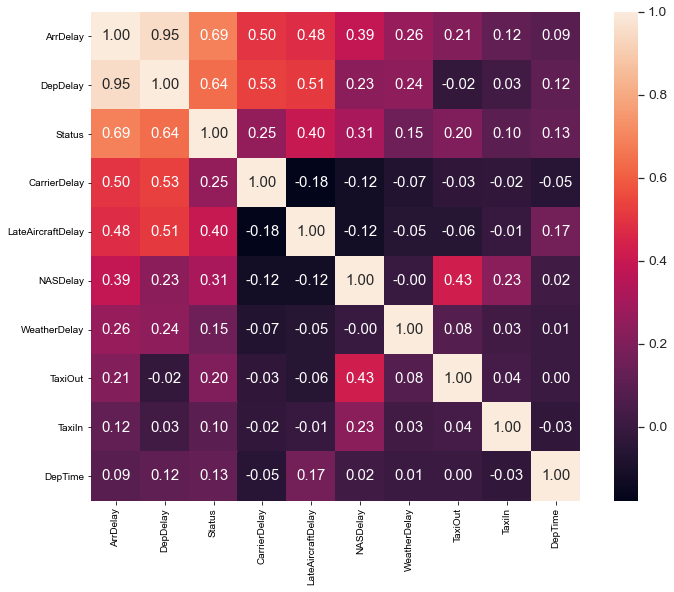

In [20]:
# looking for correlation between delayed flights 
delcorrmat = Delayedflights.corr()

k = 10 #number of variables for heatmap
f, ax = plt.subplots(figsize=(12, 9))
cols = delcorrmat.nlargest(k, 'ArrDelay')['ArrDelay'].index
cm = np.corrcoef(Delayedflights[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

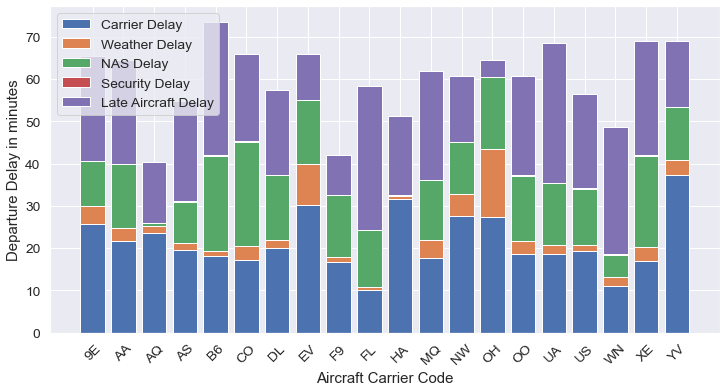

In [21]:
# we grouped by the carriers and added up all the delay time reasons to get an idea of average delay times and their reasons for all the different carriers
flights['total_delay'] = (flights['CarrierDelay'] + flights['WeatherDelay']
             + flights['NASDelay'] + flights['SecurityDelay'] + flights['LateAircraftDelay'])

flights_delayed = flights[~np.isnan(flights['total_delay'])]
flights['total_delay'].fillna(0, inplace=True)
flights_delayed.head()

carrier_group = flights_delayed['CarrierDelay'].groupby(flights_delayed['UniqueCarrier']).mean()
weather_group = flights_delayed['WeatherDelay'].groupby(flights_delayed['UniqueCarrier']).mean()
nas_group = flights_delayed['NASDelay'].groupby(flights_delayed['UniqueCarrier']).mean()
security_group = flights_delayed['SecurityDelay'].groupby(flights_delayed['UniqueCarrier']).mean()
late_group = flights_delayed['LateAircraftDelay'].groupby(flights_delayed['UniqueCarrier']).mean()

w_bottom = carrier_group.values
n_bottom = w_bottom + weather_group.values
s_bottom = n_bottom + nas_group.values
l_bottom = s_bottom + security_group.values

x = carrier_group.index.values

fig, ax = plt.subplots(figsize = (12,6))
ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation = 45)
ax.bar(np.arange(len(x)),carrier_group.values, align='center', label='Carrier Delay')
ax.bar(np.arange(len(x)),weather_group.values, align='center', bottom=w_bottom, label='Weather Delay')
ax.bar(np.arange(len(x)),nas_group.values, align='center', bottom=n_bottom, label='NAS Delay')
ax.bar(np.arange(len(x)),security_group.values, align='center', bottom=s_bottom, label='Security Delay')
ax.bar(np.arange(len(x)),late_group.values, align='center', bottom=l_bottom, label='Late Aircraft Delay')

ax.set_xlabel('Aircraft Carrier Code')
ax.set_ylabel('Departure Delay in minutes')

plt.legend()
plt.show()

In [22]:
# we show a summary table for the carriers showing several totals and averages
carrier_flights = flights['UniqueCarrier'].groupby(flights['UniqueCarrier']).count()
carrier_cancelled = flights['Cancelled'].groupby(flights['UniqueCarrier']).sum()
carrier_delayed = flights_delayed['UniqueCarrier'].groupby(flights_delayed['UniqueCarrier']).count()
carrier_diverted = flights['Diverted'].groupby(flights['UniqueCarrier']).sum()
carrier_avg_time = flights['AirTime'].groupby(flights['UniqueCarrier']).mean()
carrier_avg_dist = flights['Distance'].groupby(flights['UniqueCarrier']).mean()
carrier_avg_delay = flights['total_delay'].groupby(flights['UniqueCarrier']).mean()
carrier_avg_taxiIn = flights['TaxiIn'].groupby(flights['UniqueCarrier']).mean()
carrier_avg_taxiOut = flights['TaxiOut'].groupby(flights['UniqueCarrier']).mean()
carrier_pct_cancelled = 100*np.divide(carrier_cancelled, carrier_flights)


summary_table_carrier = pd.concat([carrier_flights, carrier_cancelled, carrier_pct_cancelled,carrier_diverted,carrier_avg_time, carrier_avg_dist, carrier_avg_delay,carrier_avg_taxiIn, carrier_avg_taxiOut], axis=1)

summary_table_carrier.columns = [ 'Total Flights', 'Cancelled Flights', 'Percent Cancelled',
                         'Diverted Flights', 'Average Flight Time (minutes)',
                         'Average Flight Distance (miles)', 'Average Flight Delay (minutes)', 
                         'Average Taxi-In (minutes)', 'Average Taxi-Out (minutes)']
summary_table_carrier

,Total Flights,Cancelled Flights,Percent Cancelled,Diverted Flights,Average Flight Time (minutes),Average Flight Distance (miles),Average Flight Delay (minutes),Average Taxi-In (minutes),Average Taxi-Out (minutes)
UniqueCarrier,,,,,,,,,
9E,51885,58,0.111786,258,73.053445,464.447008,65.577641,8.281970,20.851633
AA,191865,46,0.023975,909,144.458776,1081.993985,64.602826,7.919409,18.905491
AQ,750,0,0.000000,6,115.480667,889.870667,40.481000,4.179333,8.373333
AS,39293,11,0.027995,272,129.557326,944.703433,54.913575,5.804164,15.827501
B6,55315,10,0.018078,380,150.383983,1107.937413,73.506624,6.484751,25.031754
CO,100195,38,0.037926,426,165.545596,1239.995549,65.970562,8.228983,23.647537
DL,114238,21,0.018383,489,132.128097,968.531487,57.387240,8.838679,22.994722
EV,81877,29,0.035419,86,72.288787,461.494131,65.863426,7.283816,18.155935
F9,28269,2,0.007075,43,122.252803,897.038204,42.127545,7.167551,15.526301


In [23]:
# lets group by Origin city, of which there are many more than unique carries, so we may be able to see more intricate aspects of the data
origin_flights = flights['Origin'].groupby(flights['Origin']).count()
origin_cancelled = flights['Cancelled'].groupby(flights['Origin']).sum()
origin_delayed = flights_delayed['UniqueCarrier'].groupby(flights_delayed['Origin']).count()
origin_diverted = flights['Diverted'].groupby(flights['Origin']).sum()
origin_avg_time = flights['AirTime'].groupby(flights['Origin']).mean()
origin_avg_dist = flights['Distance'].groupby(flights['Origin']).mean()
origin_avg_delay = flights['total_delay'].groupby(flights['Origin']).mean()
origin_avg_taxiIn = flights['TaxiIn'].groupby(flights['Origin']).mean()
origin_avg_taxiOut = flights['TaxiOut'].groupby(flights['Origin']).mean()
origin_pct_cancelled = 100*np.divide(origin_cancelled, origin_flights)
summary_table_origin = pd.concat([origin_flights, origin_cancelled, origin_pct_cancelled, origin_diverted, 
                           origin_avg_time, origin_avg_dist, origin_avg_delay,
                           origin_avg_taxiOut], axis=1)

summary_table_origin.columns = ['Total Flights', 'Cancelled Flights', 'Percent Cancelled',
                         'Diverted Flights', 'Average Flight Time (minutes)',
                         'Average Flight Distance (miles)', 'Average Flight Delay (minutes)', 
                         'Average Taxi-Out (minutes)']
summary_table_origin = summary_table_origin.sort_values('Total Flights', ascending=False)
summary_table_origin.head(15)

,Total Flights,Cancelled Flights,Percent Cancelled,Diverted Flights,Average Flight Time (minutes),Average Flight Distance (miles),Average Flight Delay (minutes),Average Taxi-Out (minutes)
Origin,,,,,,,,
ATL,131613,33,0.025074,367,95.536354,662.517039,56.668305,22.307667
ORD,125979,86,0.068265,442,101.961462,717.682145,67.225498,21.590753
DFW,95414,27,0.028298,329,109.269546,801.290785,55.125447,17.525195
DEN,74323,35,0.047092,255,115.189381,862.161269,54.140022,16.900078
LAX,58772,17,0.028925,210,138.828873,1100.641241,55.315330,15.296357
IAH,56847,48,0.084437,228,122.552893,908.519253,62.343577,20.899942
PHX,55720,8,0.014358,206,117.102032,896.998277,50.598095,14.816574
LAS,53710,13,0.024204,161,121.047279,953.109477,53.021078,16.953817
EWR,52925,12,0.022674,157,149.753692,1034.806953,70.060792,31.754058


In [24]:
# grouping by destination instead of origin 
dest_flights = flights['Dest'].groupby(flights['Dest']).count()
dest_cancelled = flights['Cancelled'].groupby(flights['Dest']).sum()
dest_delayed = flights_delayed['UniqueCarrier'].groupby(flights_delayed['Dest']).count()
dest_diverted = flights['Diverted'].groupby(flights['Dest']).sum()
dest_avg_time = flights['AirTime'].groupby(flights['Dest']).mean()
dest_avg_dist = flights['Distance'].groupby(flights['Dest']).mean()
dest_avg_delay = flights['total_delay'].groupby(flights['Dest']).mean()
dest_avg_taxiIn = flights['TaxiIn'].groupby(flights['Dest']).mean()
dest_avg_taxiOut = flights['TaxiOut'].groupby(flights['Dest']).mean()
dest_pct_cancelled = 100*np.divide(dest_cancelled, dest_flights)
summary_table_dest = pd.concat([dest_flights, dest_cancelled, dest_pct_cancelled, dest_diverted, 
                           dest_avg_time, dest_avg_dist, dest_avg_delay,
                           dest_avg_taxiIn], axis=1)

summary_table_dest.columns = ['Total Flights', 'Cancelled Flights', 'Percent Cancelled',
                         'Diverted Flights', 'Average Flight Time (minutes)',
                         'Average Flight Distance (miles)', 'Average Flight Delay (minutes)', 
                         'Average Taxi-In (minutes)']

summary_table_dest = summary_table_dest.sort_values('Total Flights', ascending=False)
summary_table_dest.head(15)

,Total Flights,Cancelled Flights,Percent Cancelled,Diverted Flights,Average Flight Time (minutes),Average Flight Distance (miles),Average Flight Delay (minutes),Average Taxi-In (minutes)
Dest,,,,,,,,
ORD,108984,73,0.066982,646,105.060451,715.203076,77.545218,9.392542
ATL,106898,26,0.024322,332,96.095286,656.873945,65.258662,11.068909
DFW,70657,15,0.021229,461,114.795713,805.029424,62.507860,9.971956
DEN,63003,14,0.022221,139,119.208040,839.918686,55.923908,7.880895
LAX,59969,14,0.023345,112,152.708294,1102.813203,56.298367,8.921501
EWR,55861,21,0.037593,348,132.316127,977.518662,76.489429,10.462474
LAS,48858,7,0.014327,241,137.022944,955.398154,53.947857,6.627799
PHX,47836,9,0.018814,134,134.327825,944.782068,53.259968,6.322905
SFO,46876,6,0.012800,118,146.777359,1010.568308,66.094261,6.074900


In [25]:
# defining a function biplot for bivariate analysis

def biplot(df, x_name, y_name):
    fig, ax = plt.subplots()
    ax.grid(False)
    x = df[x_name]
    y = df[y_name]
    plt.scatter(x,y,c='blue', edgecolors='none',alpha=0.5)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title('{x_name} vs. {y_name}'.format(x_name=x_name, y_name=y_name))
    plt.show()

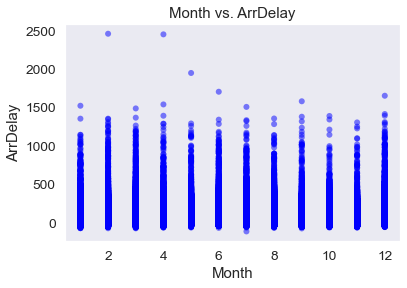

In [26]:
# ploting months vs arrival delay
biplot(df=flights,x_name='Month',y_name='ArrDelay')

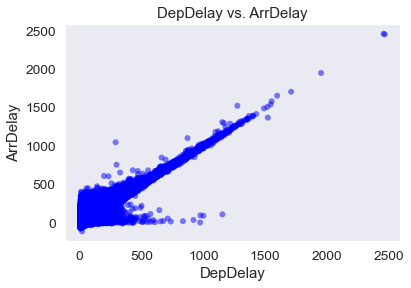

In [27]:
# ploting departure delay vs arrival delay 
biplot(df=flights,x_name='DepDelay',y_name='ArrDelay')

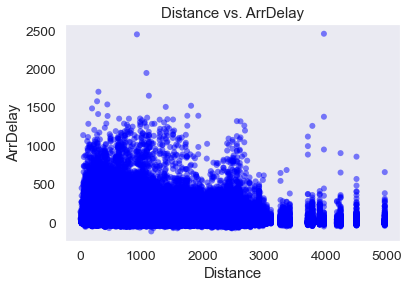

In [28]:
# plotting distance vs arrival delay 
biplot(df=flights,x_name='Distance',y_name='ArrDelay')

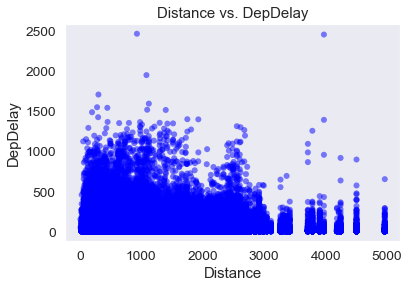

In [29]:
# plotting distance vs departure delay 
biplot(df=flights,x_name='Distance',y_name='DepDelay')

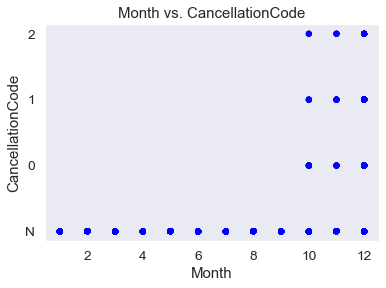

In [30]:
# plotting months vs cancellation code
biplot(df=flights,x_name='Month',y_name='CancellationCode')

Text(0, 0.5, 'Amount of flights')

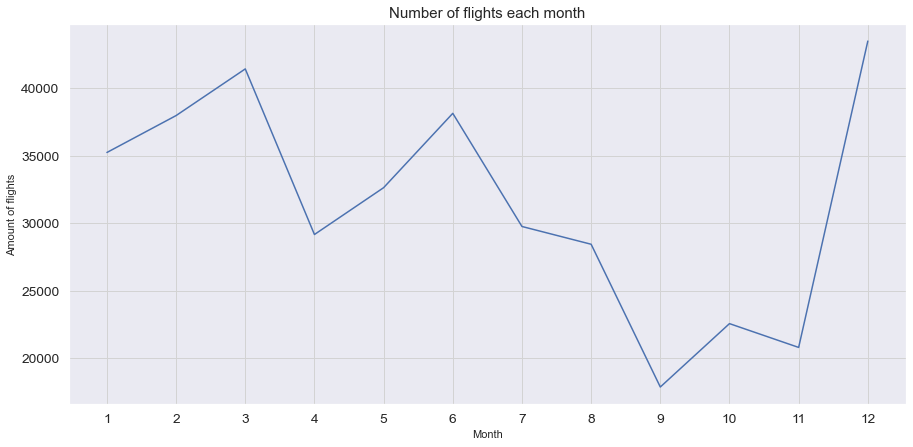

In [31]:
## Amount of flights in each month
flights['MonthT'] = np.where(flights.Year==2008,flights.Month,flights.Month)
flights['Ones'] = 1
FlightsEM = flights[flights.UniqueCarrier=='WN'].groupby('MonthT')['Ones'].sum()

plt.figure(figsize=(15,7))
sns.lineplot(x = FlightsEM.index, y=FlightsEM.values).grid(b=True, color='lightgrey')
plt.title('Number of flights each month',fontsize=15)

plt.xticks(np.arange(1,13,1))
plt.xlabel('Month',fontsize=11)
plt.ylabel('Amount of flights',fontsize=11)

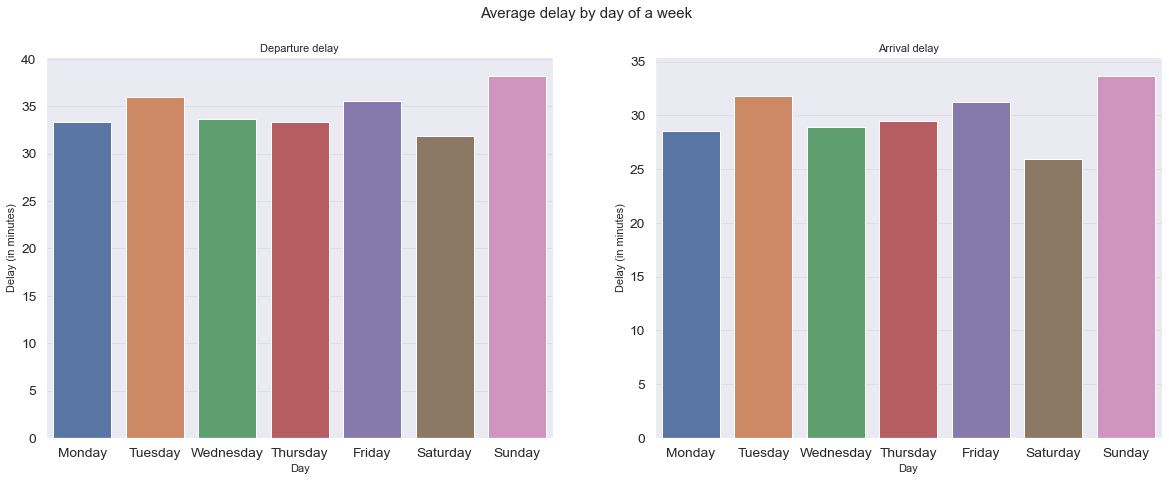

In [32]:

# Departure delay in each weekday(departure delay and arrival delays)
fig, axarr = plt.subplots(1,2,figsize=(20,7))

WeekdayName = []
for i in range(0,7):
    WeekdayName.append(calendar.day_name[i])

plt.suptitle('Average delay by day of a week',fontsize=15)
    
flightsWN = flights[flights.UniqueCarrier=='WN']
delay1 = flightsWN.groupby('DayOfWeek')['DepDelay'].mean()
sns.barplot(x=delay1.index, y=delay1.values, ax=axarr[0]).yaxis.grid(True, color='lightgrey',alpha=0.5)
axarr[0].set_title('Departure delay', fontsize=11)
delay1 = flightsWN.groupby('DayOfWeek')['ArrDelay'].mean()
sns.barplot(x=delay1.index, y=delay1.values, ax=axarr[1]).yaxis.grid(True, color='lightgrey',alpha=0.5)
axarr[1].set_title('Arrival delay',fontsize=11)

for i in [0,1]:
    axarr[i].set_xticklabels(WeekdayName)
    axarr[i].set_xlabel('Day', fontsize=11)
    axarr[i].set_ylabel('Delay (in minutes)', fontsize=11)
    axarr[i].set_xticklabels(WeekdayName)

Text(0.5, 1.0, 'Arrival delay')

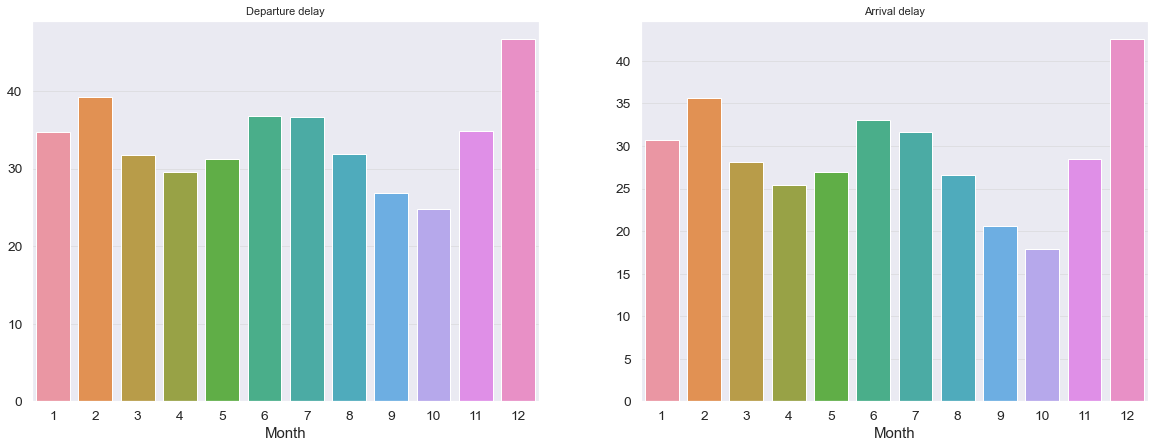

In [33]:
# Delays in each month(departure and arrival delays )
fig, axarr = plt.subplots(1,2,figsize=(20,7))

flightsWN = flights[flights.UniqueCarrier=='WN']
delay1 = flightsWN.groupby('Month')['DepDelay'].mean()
sns.barplot(x=delay1.index, y=delay1.values, ax=axarr[0]).yaxis.grid(True, color='lightgrey',alpha=0.5)
axarr[0].set_title('Departure delay', fontsize=11)

flightsWN = flights[flights.UniqueCarrier=='WN']
delay1 = flightsWN.groupby('Month')['ArrDelay'].mean()
sns.barplot(x=delay1.index, y=delay1.values, ax=axarr[1]).yaxis.grid(True, color='lightgrey',alpha=0.5)
axarr[1].set_title('Arrival delay',fontsize=11)
